In [119]:
import astropy.units as u
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
#2 

#initial conditions:

k  = 0.0022
g = 9.8
v_t = sqrt(g/k)
dt = (1000./v_t)/20.
h0 = 4000

print(dt)


0.749149177264


In [121]:
def rhs_sdiver(v, h,dt):
    v = v + dt*(k*v**2-g)
    h = h +dt*v
    return v,h

In [122]:
#create arrays to keep track of where the skydiver is and the correlating time step
varr = []
tarr = []
harr = []
tmax = 3*1000./v_t
t = 0
v = 0 #reset v so we can actually do the full simulation
h = 4000
print(tmax)

44.9489506359


In [123]:
#evaluate the skydiver while in the time period
while t<tmax: 
    v, h = rhs_sdiver(v,h,dt) 
    varr.append(v)
    harr.append(h)
    tarr.append(t)
    t += dt
#print(tarr,varr)
    

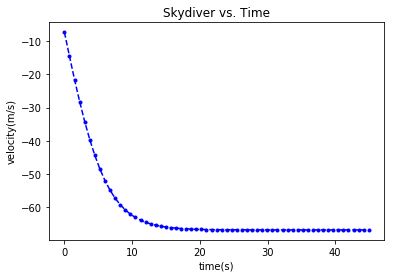

In [133]:

fig1 =plt.plot(tarr, varr, 'b.--', label = 'Velocity')
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')
plt.title('Skydiver vs. Time')



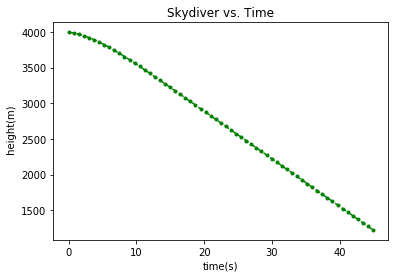

In [131]:
fig2 = plt.plot(tarr, harr, 'g.--', label = 'Height')
plt.xlabel('time(s)')
plt.ylabel(' height(m)')
plt.title('Skydiver vs. Time')

# Nuclear lab (3b)

In [149]:
rho = 100
rate = 7.36E-06
rate_rho  = rate * rho
print (rate_rho)


0.000736


In [167]:
X0 = array([0.7,0.3,0])
A = array([1,12,13])
Y0 = X0/A
print(Y0)
Y =Y0
dt = 0.1
#Y = [YH, YC, YN]

[ 0.7    0.025  0.   ]


In [166]:
print(Y)
Y = Y + dt*nuc_rhs(Y, rate_rho)
print(Y)

[  6.99870258e-01   2.48702584e-02   1.29741577e-04]
[  6.99868977e-01   2.48689773e-02   1.31022655e-04]


In [165]:
def nuc_rhs(Y, rate_rho):
    YH,YC,YN = Y[0], Y[1], Y[2] 
    dYH = -rate_rho*YH*YC
    dYC = -rate_rho*YH*YC
    dYN = rate_rho*YH*YC
    return np.array([dYH, dYC, dYN])

In [186]:
tarr = []
yarr = []
Y = Y0

t = 0 
tmax = 50000
dt = 1000
while t<tmax:
    Y = Y + dt*(nuc_rhs(Y, rate_rho))
    yarr.append(Y)
    tarr.append(t)
    t = t+dt
    
#print(tarr) 
#print (yarr)

[ 0.68712  0.01212  0.01288] [  6.75000000e-01   2.84045978e-17   2.50000000e-02]


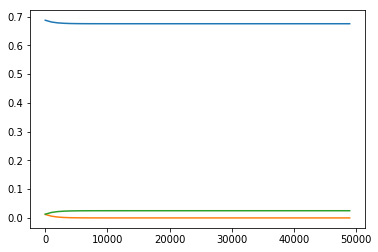

In [187]:
fig1 = plt.plot(tarr, yarr)
print(yarr[0],yarr[-1])

## Wave Lab

In [252]:
from scipy import interpolate

In [253]:
%%bash
wget http://www.ndbc.noaa.gov/data/realtime2/46206.txt?accesstype=Download -O wvdat.txt

--2018-04-13 22:01:44--  http://www.ndbc.noaa.gov/data/realtime2/46206.txt?accesstype=Download
Resolving www.ndbc.noaa.gov (www.ndbc.noaa.gov)... 140.90.238.27
Connecting to www.ndbc.noaa.gov (www.ndbc.noaa.gov)|140.90.238.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102554 (100K) [text/plain]
Saving to: 'wvdat.txt'

     0K .......... .......... .......... .......... .......... 49% 68.3K 1s
    50K .......... .......... .......... .......... .......... 99%  176K 0s
   100K                                                       100%  287G=1.0s

2018-04-13 22:01:46 (98.6 KB/s) - 'wvdat.txt' saved [102554/102554]



In [254]:
filename = 'wvdat.txt'
file = open(filename, "r")
file = file.readlines()
data = []
for i in range(2,50):
    line = file[i].split()
    data.append(line)
#print(len(data))
data = np.array(data).T
YY = [int(i) for i in data[0]]
MM = [int(i) for i in data[1]]
DD = [int(i) for i in data[2]]
hh = [int(i) for i in data[3]]
YY = [int(i) for i in data[4]]
WDIR = [int(i) for i in data[5]]
WSPD = [float(i) for i in data[6]]
GST = [float(i) for i in data[7]]
WVHT = [float(i) for i in data[8]]
DPD = [int(i) for i in data[9]]
len(WSPD)






48

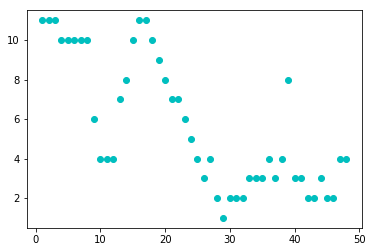

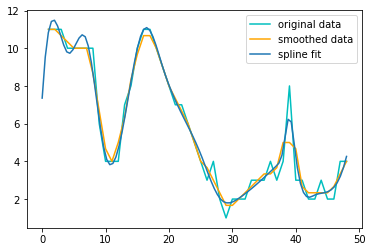

In [287]:
t = np.arange(1,49,1)
len(t)
#t[10]
plt.plot(t,WSPD,'c', label = "original data")

smooth_spd = [(WSPD[0]+WSPD[1])/2]

for i in range(1,47):
    newval = ( WSPD[i-1]+WSPD[i+1]+ WSPD[i])/3
    smooth_spd.append(newval)
smooth_spd.append((WSPD[-1]+WSPD[-2])/2)
#print(len(smooth_spd),len(t))

plt.plot(t, smooth_spd,'orange', label = 'smoothed data')
 
wv_int = interpolate.splrep(t,WSPD,s=15)
tvals=  np.linspace(0,48,100)
plt.plot(tvals, interpolate.splev(tvals, wv_int, der = 0),label = 'spline fit')
plt.legend()
plt.figure(figsize  = (5,5))


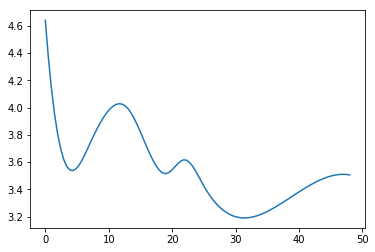

In [291]:
wvht_spl = interpolate.splrep(t,WVHT, s=1)
plt.plot(tvals, interpolate.splev(tvals,wvht_spl, der=0))

In [ ]:
##units: 
import astropy.units as u
import astropy.constants as c
